# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

In [ ]:
Ans[1]:神经元节点包含输入与输出，将输入的节点通过本节点的计算方式生成本节点的值进行前向传播，并将本节点的梯度结合输出节点传回的梯度结合
       进行反向传播。

####  2. Why we use non-linear activation funcitons in neural networks?

In [2]:
Ans[2]:如果使用线性函数作为激活函数的话，神经网络的深度就没有意义了，因为不论多少层，都可以最终用一层线性函数来代替。

#### 3. What is the 'Logistic Loss' ?

In [5]:
Ans[3]:'Logistic Loss' 是二分类问题的cost function，使用真实值与预测值作为输入，利用log函数计算loss

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

In [ ]:
Ans[4]:C

#### 5. Why we don't use zero initialization for all parameters ?

In [ ]:
Ans[5]:因为神经网络存在隐藏层，如果将权值参数w初始化为0，经过前向传播到隐藏层时，通过激活函数计算得到的不同神经元的值可以认为是相似(相差一个b常数)
       甚至是相同的(b也初始化为0)，这时在反向传播过程中，我们使用梯度下降的方式来降低损失函数，在更新权值的过程中，代价函数对不同权值参数的偏导数相同,
        无论更新多少轮，参数也没有产生迭代变化，神经网络也就失去了学习能力。
    
        

#### 6. Can you implement the softmax function using python ? 

In [6]:
def softmax_1(x):
    e = np.exp(x)
    x_sum = np.sum(e,axis=1)[:, np.newaxis] # 对行求和
    b = np.tile(x_sum,(1,np.shape(x)[1])) # 填充为对应shape的sum值数组
    ret = e/b
    return ret

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overview of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [3]:
# Loading the data 
digits = datasets.load_digits()

In [4]:
digits.data.shape

(1797, 64)

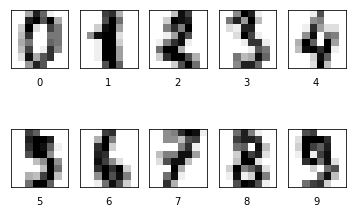

In [5]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [6]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [7]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [8]:
y_train[:200]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1])

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](network.png)

In [10]:
!pwd

'pwd' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [11]:
import numpy as np
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = None
    s = 1.0 / (1 + np.exp(-1 * z))
    
    return s

In [12]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [13]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = None
    b = None
    w = np.random.randn(dim, 1)
    b = np.random.rand()
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [14]:
from sklearn.metrics import log_loss

In [15]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[1]
    A = None
    cost = None
    A = sigmoid(np.dot(w.T, X)+b)
    cost = log_loss(Y[0], A[0])
    
    dw = None
    db = None
    dw = np.dot(X, (A-Y).T) / m
    db = np.sum([A-Y]) / m
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [16]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
#         grads, cost = None
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
#         w = None
#         b = None
        w += (-1 * learning_rate * dw)
        b += (-1 * learning_rate * db)
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [17]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
#     A = None
    A = sigmoid(np.dot(w.T, X) + b)
    

    for i in range(A.shape[1]):
#         None 
        Y_prediction[0][i] = 0 if A[0][i]<0.5 else 1 
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    
    # process parameters
    X = X_train.T
    Y = Y_train.reshape(1, -1)
    N = X.shape[0]
    w, b = initialize_parameters(N)

    # carry iteration
    params, grads, costs = optimize(w, b, X, Y, num_iterations=num_iterations,learning_rate=learning_rate, print_cost=print_cost)

    # output
    final_w= params['w']
    final_b = params['b']
    Y_predict = predict(final_w, final_b, X_test.T)
    test_accuracy = accuracy_score(Y_test, Y_predict[0])

    final_d = {
        'w': final_w,
        'b': final_b,
        'test_accuracy': test_accuracy,
        'cost': costs,
    }

    return final_d
    


In [20]:
X_train.T.shape

(64, 1347)

In [21]:
final = model(X_train, y_train, X_test, y_test, num_iterations=10000, learning_rate=1e-3, print_cost=False)

In [22]:
final

{'w': array([[ 0.48911677],
        [-0.4497674 ],
        [-0.97057582],
        [ 0.54615398],
        [ 0.09259061],
        [ 0.75731179],
        [ 0.47227535],
        [ 1.42710524],
        [-0.39633252],
        [-0.26950789],
        [ 0.13391163],
        [ 0.26715617],
        [ 0.18466083],
        [-0.44158625],
        [-0.31598342],
        [-0.12393648],
        [-2.55973928],
        [ 0.39750256],
        [ 0.86938255],
        [-0.30254052],
        [-0.97727575],
        [-0.04825601],
        [-0.21487333],
        [ 0.39216246],
        [-0.95893012],
        [-1.74078761],
        [ 0.0244092 ],
        [ 0.86730774],
        [ 0.11638098],
        [ 0.66603122],
        [-0.82061281],
        [ 0.65011466],
        [-0.76665432],
        [-0.36407708],
        [ 0.40026596],
        [ 0.2686487 ],
        [-0.02553599],
        [-0.4466209 ],
        [ 0.49768675],
        [-0.20174878],
        [-0.38281341],
        [ 0.6560904 ],
        [-0.47762728],
      

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

##### 4.2 Observe the effect of iteration_num on the test accuracy.

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digits (0,1,2,3,4,5,6,7,8,9) is in the image.

# Congratulations ! You have completed assigment 4. 